In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Read the image and print some statistics about it 

In [7]:
# read the image 
image = mpimg.imread('road.jpg')
print('this image is {} with dimensions {}'.format(type(image), image.shape))

this image is <class 'numpy.ndarray'> with dimensions (540, 960, 3)


In [8]:
ysize = image.shape[0]
xsize = image.shape[1]

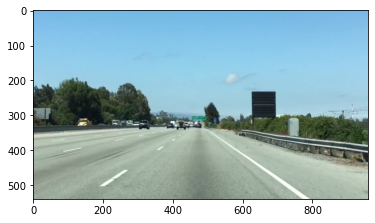

In [9]:
#always make a copy rather than using = as both variables will reference the same thing 
color_select = np.copy(image)
plt.imshow(color_select)

## Extract the edges by colors
- Next I define a color threshold in the variables red_threshold, green_threshold, and blue_threshold and populate rgb_threshold with these values. This vector contains the minimum values for red, green, and blue (R,G,B) that I will allow in my selection.

In [1]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
color_select = np.copy(image)
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]
# we applied masking to select all the pixels below a certain threshold and let them = 0 -black them- in the second line 

# Display the image                 
plt.imshow(color_select)
plt.show()


NameError: name 'np' is not defined

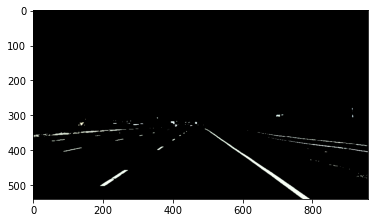

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('road.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
mpimg.imsave("test-after.jpg", color_select)

Here's how I did it… I started by just trying some guesses.

Eventually, I found that with red_threshold = green_threshold = blue_threshold = 200, I get a pretty good result, where I can clearly see the lane lines, but most everything else is blacked out.

At this point, however, it would still be tricky to extract the exact lines automatically, because we still have many other pixels detected around the periphery.

## code intro text

- In this case, I'll assume that the front facing camera that took the image is mounted in a fixed position on the car, such that the lane lines will always appear in the same general region of the image. Next, I'll take advantage of this by adding a criterion to only consider pixels for color selection in the region where we expect to find the lane lines.

- Check out the code below. The variables left_bottom, right_bottom, and apex represent the vertices of a triangular region that I would like to retain for my color selection, while masking everything else out. Here I'm using a triangular mask to illustrate the simplest case, but later you'll use a quadrilateral, and in principle, you could use any polygon.

In [12]:
np.polyfit((20,1),(10,0),1)

array([ 0.52631579, -0.52631579])

In [13]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


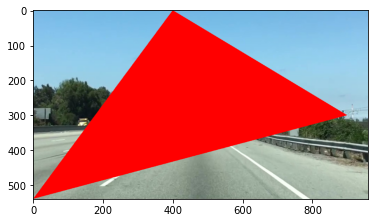

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread('road.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

# uncomment if plot does not display
# plt.show()

In [15]:
XX*fit_left[0] + fit_left[1]

array([[ 539.    ,  537.6525,  536.305 , ..., -750.5575, -751.905 ,
        -753.2525],
       [ 539.    ,  537.6525,  536.305 , ..., -750.5575, -751.905 ,
        -753.2525],
       [ 539.    ,  537.6525,  536.305 , ..., -750.5575, -751.905 ,
        -753.2525],
       ...,
       [ 539.    ,  537.6525,  536.305 , ..., -750.5575, -751.905 ,
        -753.2525],
       [ 539.    ,  537.6525,  536.305 , ..., -750.5575, -751.905 ,
        -753.2525],
       [ 539.    ,  537.6525,  536.305 , ..., -750.5575, -751.905 ,
        -753.2525]])

## Combining Color and Region Selections
Now you've seen how to mask out a region of interest in an image. Next, let's combine the mask and color selection to pull only the lane lines out of the image.

Check out the code below. Here we’re doing both the color and region selection steps, requiring that a pixel meet both the mask and color selection requirements to be retained.

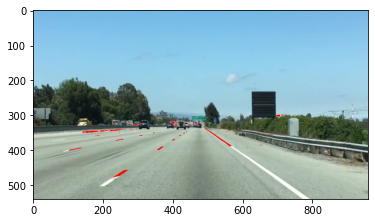

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('road.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold - color mask for the unwanted colors-
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines - region mask for the wanted region-
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0] # the things that will not be black (not color thresholds) and at the same time inside the region will be red 

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)

# uncomment if plot does not display
# plt.show()

## Quiz

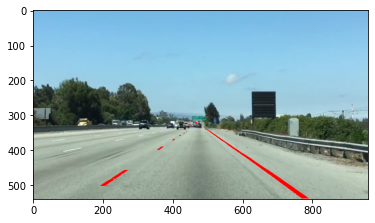

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('road.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [850, 539]
apex = [475, 300]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold - color mask for the unwanted colors-
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines -region mask for the desired region-
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
#plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select) #this is the image in where we make the region we don't want and the color we don't want black
plt.imshow(line_image) # this is the image where we make the colors we want in the region we want red

## solution

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('road.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
#plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)

## next level text

So you found the lane lines… simple right? Now you’re ready to upload the algorithm to the car and drive autonomously right?? Well, not quite yet ;)

As it happens, lane lines are not always the same color, and even lines of the same color under different lighting conditions (day, night, etc) may fail to be detected by our simple color selection.

What we need is to take our algorithm to the next level to detect lines of any color using sophisticated computer vision methods.

So, what is computer vision?

# Canny Edge Detection in Action
Now that you have a conceptual grasp on how the Canny algorithm works, it's time to use it to find the edges of the lane lines in an image of the road. So let's give that a try.

First, we need to read in an image:

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread('exit-ramp.jpg')
plt.imshow(image)

Here we have an image of the road, and it's fairly obvious by eye where the lane lines are, but what about using computer vision?

Let's go ahead and convert to grayscale.

In [ ]:
import cv2 as cv
gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

In [ ]:
import numpy as np

In [ ]:
blur_gray = cv.GaussianBlur(gray,(3,3),0)

In [ ]:
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
high_threshold = 200
low_threshold = 170
edges = cv.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

### Quiz for the whole snippets

In [ ]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 7 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
high_threshold = 175
low_threshold = 50
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

Here’s how I did it…

I chose a kernelSize of 5 for Gaussian smoothing, a lowThreshold of 50 and a highThreshold of 150. These selections nicely extract the lane lines, while minimizing the edges detected in the rest of the image, producing the result shown below.

In [ ]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
high_threshold = 150
low_threshold = 50
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

## Implementing a Hough Transform on Edge Detected Image
we apply hough transform for line models to check for the lines in canny image

Now you know how the Hough Transform works, but to accomplish the task of finding lane lines, we need to specify some parameters to say what kind of lines we want to detect (i.e., long lines, short lines, bendy lines, dashed lines, etc.).

To do this, we'll be using an OpenCV function called HoughLinesP that takes several parameters. Let's code it up and find the lane lines in the image we detected edges in with the Canny function (for a look at coding up a Hough Transform from scratch, check this out.) .

Here's the image we're working with:

Let's look at the input parameters for the OpenCV function HoughLinesP that we will use to find lines in the image. You will call it like this:

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                             min_line_length, max_line_gap)

In this case, we are operating on the image masked_edges (the output from Canny) and the output from HoughLinesP will be lines, which will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments detected by the transform operation. The other parameters define just what kind of line segments we're looking for.

First off, rho and theta are the distance and angular resolution of our grid in Hough space. Remember that, in Hough space, we have a grid laid out along the (Θ, ρ) axis. You need to specify rho in units of pixels and theta in units of radians.

mine: rho and theta determine the size of the grid that determine the tolerance of the gaps, shifted pixels and distortion

So, what are reasonable values? Well, rho takes a minimum value of 1, and a reasonable starting place for theta is 1 degree (pi/180 in radians). Scale these values up to be more flexible in your definition of what constitutes a line.

The threshold parameter specifies the minimum number of votes (intersections in a given grid cell) a candidate line needs to have to make it into the output. The empty np.array([]) is just a placeholder, no need to change it. min_line_length is the minimum length of a line (in pixels) that you will accept in the output, and max_line_gap is the maximum distance (again, in pixels) between segments that you will allow to be connected into a single line. You can then iterate through your output lines and draw them onto the image to see what you got!

In [ ]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

hough_text_outro

As you can see I've detected lots of line segments! Your job, in the next exercise, is to figure out which parameters do the best job of optimizing the detection of the lane lines. Then, you'll want to apply a region of interest mask to filter out detected line segments in other areas of the image. Earlier in this lesson you used a triangular region mask, but this time you'll get a chance to use a quadrilateral region mask using the cv2.fillPoly() function (keep in mind though, you could use this same method to mask an arbitrarily complex polygon region). When you're finished you'll be ready to apply the skills you've learned to do the project at the end of this lesson.



## Hough Transform Quiz

Question:
Now it's your turn to play with the Hough Transform on an edge-detected image. You'll start with the image on the left below. If you "Test Run" the quiz, you'll get output that looks like the center image. Your job is to modify the parameters for the Hough Transform and impose a region of interest mask to get output that looks like the image on the right. In the code, I've given you a framework for defining a quadrilateral region of interest mask.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 200     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)

(540, 960, 3)
[-1.77635684e-16  5.40000000e+02]


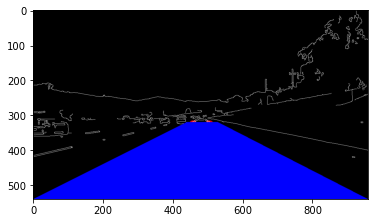

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('solidWhiteRight_Moment.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
mshape = image.shape

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(440, 320), (530, 320), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 30     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
# Draw the area 
top_left = [440,320]
top_right = [530,320]
bottom_right = [imshape[1],imshape[0]]
bottom_left = [0,imshape[0]]

left_side = np.polyfit((top_left[0], bottom_left[0]), (top_left[1], bottom_left[1]), 1)
right_side = np.polyfit((top_right[0], bottom_right[0]), (top_right[1], bottom_right[1]), 1)
bottom_side = np.polyfit((bottom_right[0], bottom_left[0]), (bottom_right[1], bottom_left[1]), 1)
top_side = np.polyfit((top_left[0], top_right[0]), (top_left[1], top_right[1]), 1)

print(bottom_side)
XX, YY = np.meshgrid(np.arange(0, imshape[1]), np.arange(0, imshape[0]))
region_thresholds = (YY > (XX*left_side[0] + left_side[1])) & \
                    (YY > (XX*top_side[0] + top_side[1])) & \
                    (YY > (XX*right_side[0] + right_side[1])) & \
                    (YY < (XX*bottom_side[0]+ bottom_side[1]))


# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges[region_thresholds] = (0,0,255)
plt.imshow(lines_edges)

SOlution

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv



# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
def detect_lanes(image):
    gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)

    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv.Canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(440, 320), (530, 320), (imshape[1],imshape[0])]], dtype=np.int32)
    cv.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv.bitwise_and(edges, mask)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 30     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 40 #minimum number of pixels making up a line
    max_line_gap = 20    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    # Draw the area 
    top_left = [440+20,320]
    top_right = [530-20,320]
    bottom_right = [imshape[1]-150,imshape[0]]
    bottom_left = [0+150,imshape[0]]

    left_side = np.polyfit((top_left[0], bottom_left[0]), (top_left[1], bottom_left[1]), 1)
    right_side = np.polyfit((top_right[0], bottom_right[0]), (top_right[1], bottom_right[1]), 1)
    bottom_side = np.polyfit((bottom_right[0], bottom_left[0]), (bottom_right[1], bottom_left[1]), 1)
    top_side = np.polyfit((top_left[0], top_right[0]), (top_left[1], top_right[1]), 1)

    XX, YY = np.meshgrid(np.arange(0, imshape[1]), np.arange(0, imshape[0]))
    region_thresholds = (YY > (XX*left_side[0] + left_side[1])) & \
                        (YY > (XX*top_side[0] + top_side[1])) & \
                        (YY > (XX*right_side[0] + right_side[1])) & \
                        (YY < (XX*bottom_side[0]+ bottom_side[1]))

    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 

    # Draw the lines on the edge image
    lines_edges = cv.addWeighted(image, 0.8, line_image, 1, 0) 
    lines_edges[region_thresholds] = (0xb9,0xff,0x99) #dcffcc
    return lines_edges

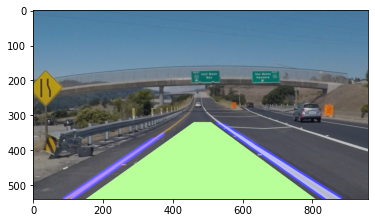

In [2]:
output = detect_lanes(image)
plt.imshow(output)

In [4]:
# apply the function on videos 
capture = cv.VideoCapture('test_videos/solidYellowLeft.mp4') #capture is instance of the videocapture class that contains the video given

while True:
    isTrue,frame = capture.read() 
    output = detect_lanes(frame)
    mpimg.imsave("solidYellowLeft.jpg", frame)
    cv.imshow('Video', output) 
    if cv.waitKey(20) & 0xFF == ord('q'): 
        break
capture.release()  
cv.destroyAllWindows() 